In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
# !git clone https://github.com/ultralytics/yolov5

In [ ]:
%cd /content/drive/MyDrive/CGS/Plant_Disease_Classification/yolov5

In [ ]:
# cd yolov5

In [ ]:
!pip install -r /content/drive/MyDrive/CGS/Plant_Disease_Classification/yolov5/requirements.txt

In [ ]:
# !pip install -r requirements.txt

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-24 Python-3.10.12 torch-2.1.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 112MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
%cd /content/drive/MyDrive/CGS/Plant_Disease_Classification/yolov5

/content/drive/MyDrive/CGS/Plant_Disease_Classification/yolov5


In [ ]:
!python train.py --img 320 --batch 15 --epochs 10 --data dataset.yaml --weights yolov5s.pt --workers 2

2024-01-24 04:09:58.464108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 04:09:58.464206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 04:09:58.466190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=15, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, op

In [ ]:
# !cd yolov5 && python train.py --img 320 --batch 15 --epochs 100 --data dataset.yaml --weights yolov5s.pt --workers 2

/bin/bash: line 1: cd: yolov5: No such file or directory


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-23 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
img_1 = '/content/images/Earlyblight.JPG'

In [ ]:
results_1 = model(img_1)
results_1.print()

image 1/1: 256x256 19 Potato_Early_Blights
Speed: 32.9ms pre-process, 70.6ms inference, 542.4ms NMS per image at shape (1, 3, 640, 640)


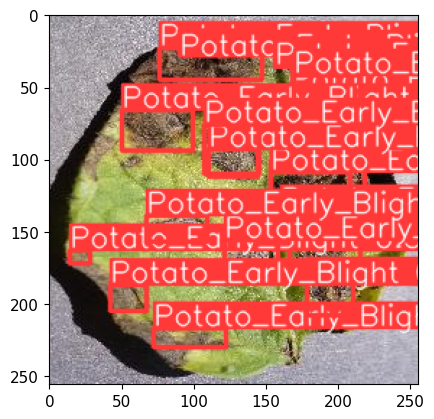

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results_1.render()))
plt.show()

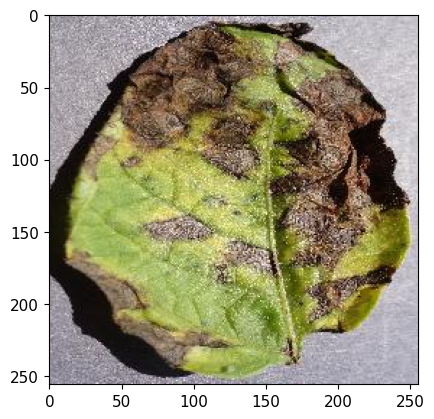

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread(img_1)
plt.imshow(img)

In [ ]:
def disease_detection_calc(image_path):

    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # plt.imshow(rgb_image)

    results = model(image_path)
    results.print()
    results.show()

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # find the green color
    mask_green = cv2.inRange(hsv, (36, 0, 0), (86,255,255))
    # find the brown color
    mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 255))
    # find the yellow color in the leaf
    mask_yellow = cv2.inRange(hsv, (14, 39, 64), (40, 255, 255))

    # find any of the three colors(green or brown or yellow) in the image
    #mask = cv2.bitwise_or(mask_green, mask_brown)
    #mask = cv2.bitwise_or(mask, mask_yellow)
    mask = cv2.bitwise_not(mask_green)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_not(img, img, mask= mask)

    brown = sum(sum(mask_brown))
    green = sum(sum(mask_green))
    yellow = sum(sum(mask_yellow))
    total = brown + green + yellow
    # percentHealthy = green / total
    percentHealthy = (green + yellow)/total
    # print(percentHealthy)
    # percentDiseased = (brown + yellow) / total
    percentDiseased = (brown) / total
    # print(percentDiseased)

    # totaldiseasepercentage = (percentDiseased + totaldiseasepercentage)/i

    # print(totaldiseasepercentage, i)

    return percentDiseased


In [ ]:
import os
image_folder_path = '/content/images'

In [ ]:
image_files = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]


In [ ]:
no_of_images = len(image_files)

image 1/1: 256x256 (no detections)
Speed: 4.8ms pre-process, 7.4ms inference, 4.6ms NMS per image at shape (1, 3, 640, 640)


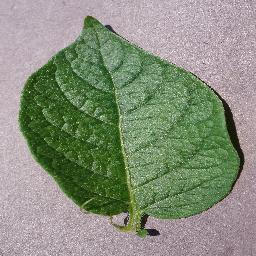

image 1/1: 256x256 17 Potato_Early_Blights
Speed: 4.1ms pre-process, 9.2ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)


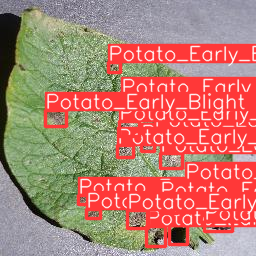

image 1/1: 256x256 3 Potato_Late_Blights
Speed: 4.0ms pre-process, 7.6ms inference, 5.6ms NMS per image at shape (1, 3, 640, 640)


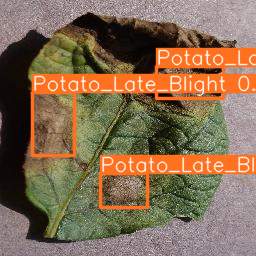

image 1/1: 256x256 (no detections)
Speed: 4.4ms pre-process, 10.8ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


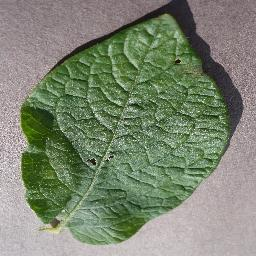

image 1/1: 256x256 (no detections)
Speed: 4.2ms pre-process, 7.8ms inference, 4.2ms NMS per image at shape (1, 3, 640, 640)


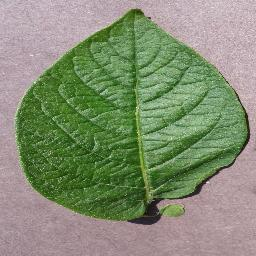

image 1/1: 256x256 6 Potato_Late_Blights
Speed: 3.4ms pre-process, 8.0ms inference, 5.1ms NMS per image at shape (1, 3, 640, 640)


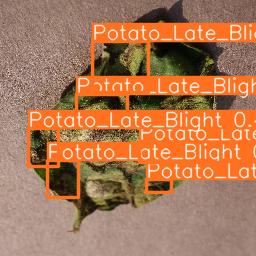

image 1/1: 256x256 (no detections)
Speed: 3.7ms pre-process, 7.4ms inference, 4.6ms NMS per image at shape (1, 3, 640, 640)


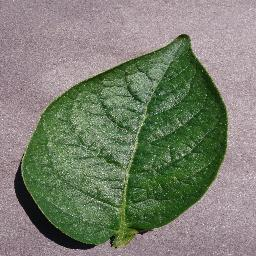

image 1/1: 256x256 18 Potato_Early_Blights
Speed: 3.8ms pre-process, 8.6ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)


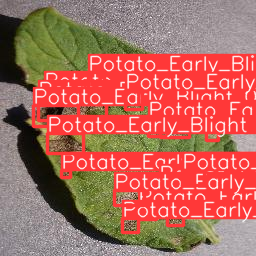

image 1/1: 256x256 19 Potato_Early_Blights
Speed: 3.7ms pre-process, 8.0ms inference, 5.0ms NMS per image at shape (1, 3, 640, 640)


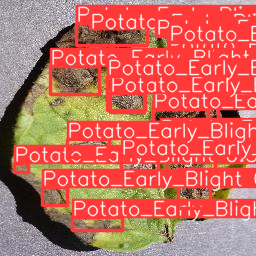

image 1/1: 256x256 (no detections)
Speed: 3.0ms pre-process, 8.6ms inference, 3.3ms NMS per image at shape (1, 3, 640, 640)


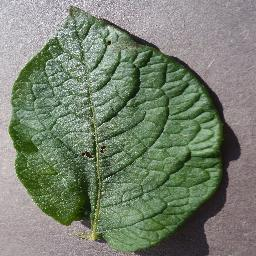

image 1/1: 256x256 13 Potato_Early_Blights
Speed: 3.8ms pre-process, 9.2ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)


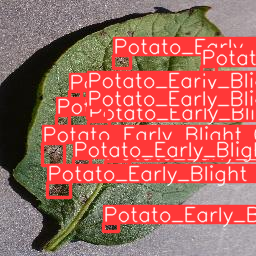

image 1/1: 256x256 4 Potato_Late_Blights
Speed: 3.8ms pre-process, 10.7ms inference, 2.6ms NMS per image at shape (1, 3, 640, 640)


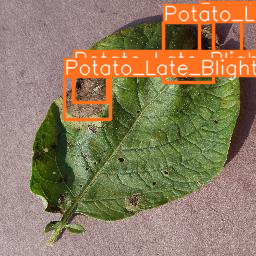

image 1/1: 256x256 6 Potato_Late_Blights
Speed: 3.7ms pre-process, 7.7ms inference, 5.3ms NMS per image at shape (1, 3, 640, 640)


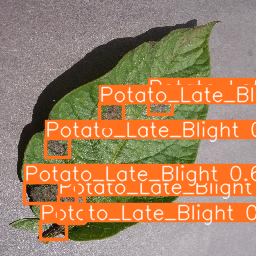

image 1/1: 256x256 6 Potato_Late_Blights
Speed: 3.8ms pre-process, 7.9ms inference, 5.2ms NMS per image at shape (1, 3, 640, 640)


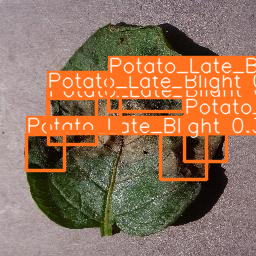

image 1/1: 256x256 3 Potato_Late_Blights
Speed: 3.9ms pre-process, 9.4ms inference, 4.2ms NMS per image at shape (1, 3, 640, 640)


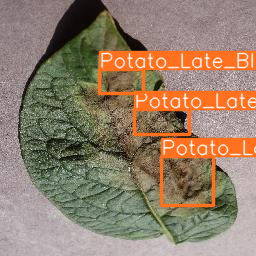

image 1/1: 256x256 5 Potato_Early_Blights, 6 Potato_Late_Blights
Speed: 3.8ms pre-process, 10.3ms inference, 2.6ms NMS per image at shape (1, 3, 640, 640)


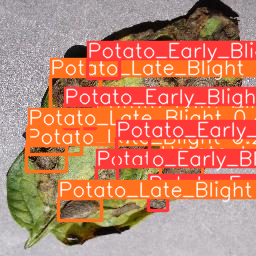

image 1/1: 256x256 9 Potato_Early_Blights, 1 Potato_Late_Blight
Speed: 3.9ms pre-process, 9.9ms inference, 4.1ms NMS per image at shape (1, 3, 640, 640)


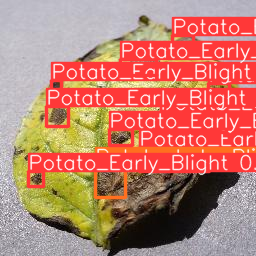

image 1/1: 256x256 2 Potato_Late_Blights
Speed: 3.6ms pre-process, 9.3ms inference, 3.7ms NMS per image at shape (1, 3, 640, 640)


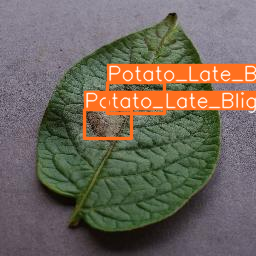

image 1/1: 256x256 (no detections)
Speed: 6.0ms pre-process, 7.3ms inference, 4.7ms NMS per image at shape (1, 3, 640, 640)


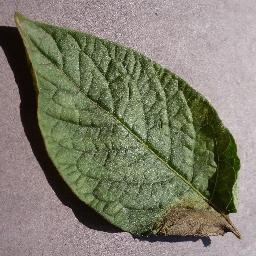

image 1/1: 256x256 4 Potato_Late_Blights
Speed: 6.5ms pre-process, 7.6ms inference, 5.4ms NMS per image at shape (1, 3, 640, 640)


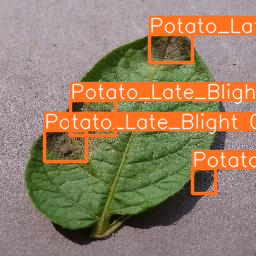

image 1/1: 256x256 17 Potato_Early_Blights
Speed: 3.8ms pre-process, 8.1ms inference, 4.9ms NMS per image at shape (1, 3, 640, 640)


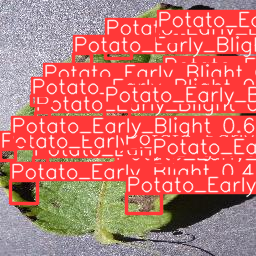

image 1/1: 256x256 24 Potato_Early_Blights
Speed: 4.1ms pre-process, 8.0ms inference, 5.2ms NMS per image at shape (1, 3, 640, 640)


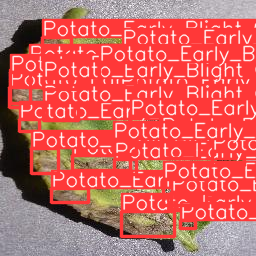

image 1/1: 256x256 (no detections)
Speed: 3.6ms pre-process, 7.5ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)


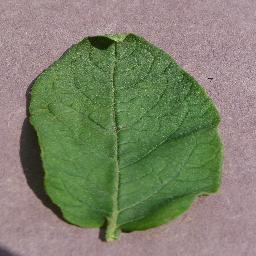

image 1/1: 256x256 11 Potato_Early_Blights, 2 Potato_Late_Blights
Speed: 3.8ms pre-process, 7.9ms inference, 5.1ms NMS per image at shape (1, 3, 640, 640)


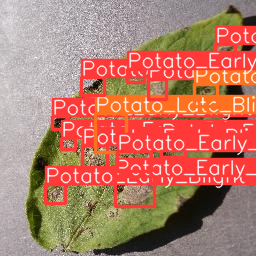

image 1/1: 256x256 (no detections)
Speed: 3.5ms pre-process, 7.5ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)


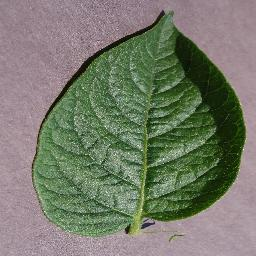

image 1/1: 256x256 26 Potato_Early_Blights
Speed: 3.6ms pre-process, 7.6ms inference, 5.5ms NMS per image at shape (1, 3, 640, 640)


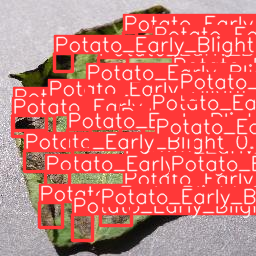

image 1/1: 256x256 (no detections)
Speed: 3.8ms pre-process, 7.4ms inference, 6.8ms NMS per image at shape (1, 3, 640, 640)


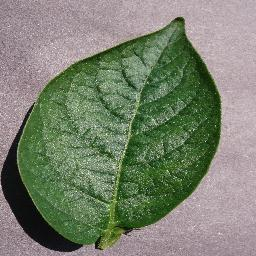

image 1/1: 256x256 9 Potato_Late_Blights
Speed: 3.9ms pre-process, 8.6ms inference, 4.9ms NMS per image at shape (1, 3, 640, 640)


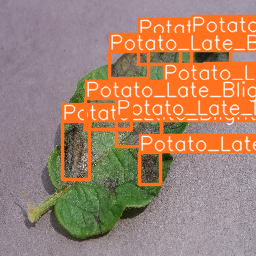

image 1/1: 256x256 (no detections)
Speed: 3.7ms pre-process, 7.9ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)


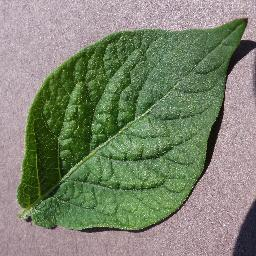

image 1/1: 256x256 (no detections)
Speed: 3.6ms pre-process, 7.8ms inference, 4.2ms NMS per image at shape (1, 3, 640, 640)


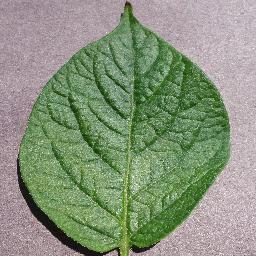

image 1/1: 256x256 19 Potato_Early_Blights
Speed: 3.7ms pre-process, 7.6ms inference, 5.4ms NMS per image at shape (1, 3, 640, 640)


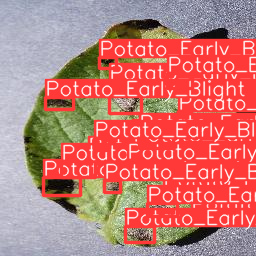

image 1/1: 256x256 3 Potato_Late_Blights
Speed: 3.5ms pre-process, 7.4ms inference, 5.5ms NMS per image at shape (1, 3, 640, 640)


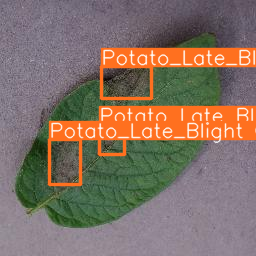

Disease affected area: 34.34%
Total Crop Yield : 65.66%


In [ ]:
totaldiseasepercentage = []

# Iterate through the image files
for image_file in image_files:
  image_path = os.path.join(image_folder_path, image_file)
  percentage_of_disease = disease_detection_calc(image_path)
  Disease_affected_area = percentage_of_disease * 100
  totaldiseasepercentage.append(Disease_affected_area)
  # print(f'Disease_affected_area: {Disease_affected_area:.2f}%')

total_disease_percentage = (sum(totaldiseasepercentage))/no_of_images
crop_yield = 100 - total_disease_percentage
print(f'Disease affected area: {total_disease_percentage:.2f}%')
print(f'Total Crop Yield : {crop_yield:.2f}%')